<img src="./ROC-AUC.jpg" width=300px>

### ROC曲线
- [详解ROC计算过程](https://blog.csdn.net/ybdesire/article/details/51999995)

In [20]:
import numpy as np
 
from sklearn.metrics import roc_curve                         # ROC curve

import matplotlib.pyplot as plt

In [21]:
#############计算fpr,tpr##################
##y是一个一维数组（样本的真实分类），数组值表示类别（一共有两类，1和2），人工标注，属于测试集的真实分类
##score即各个样本属于正例的概率；是网络的输出；首先用训练集训练网络，然后利用测试集的数据产生的
##fpr, tpr是ROC的横纵坐标
##thresholds是截断阈值
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

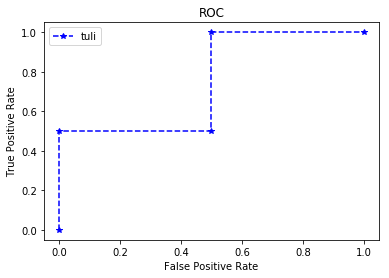

In [22]:
#############画图##################
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,'--*b',label="tuli")
plt.legend()
plt.show()

### AUC计算

In [23]:
from sklearn.metrics import roc_auc_score                        # AUC score function

#### 方法一
$$AUC=P(P_{pos}>P_{neg})(相等则为0.5)$$

1.数据一共有2（pos）\*2（neg）个样本对（pos，neg）:`（D,B）,（D,A）,(C,B),（C,A）`   

|ID|label|pro|   
|-|-|-| 
|A|0|0.1|
|B|0|0.4|
|C|1|0.35|
|D|1|0.8|

2.在`（D,B）`样本对中，正样本D预测的概率大于负样本B预测的概率（也就是D的得分比B高），记为1        
3.以此类推，$AUC=\frac{1+1+0+1}{4}=0.75$

|pairs|front|back| result|   
|-|-|-|-| 
|（D,B）|0.8|0.4| 1|
|（D,A）|0.8|0.1| 1|
|（C,B）|0.35|0.4| 0|
|（C,A）|0.35|0.1| 1|

#### 方法二
$$AUC=\frac{\sum_{ins_i\in positiveclass}rank_{ins_i}-\frac{M(M+1)}{2}}{M*N}$$

1.数据一共有M * N(2(pos) * 2(neg)):    

|ID|label|pro|   
|-|-|-| 
|A|0|0.1|
|B|0|0.4|
|C|1|0.35|
|D|1|0.8|

2.对概率排序（ `pro` 由小到大）  

|ID|label|pro|rank|
|-|-|-|-|
|A|0|0.1|1|
|C|1|0.35|2|
|B|0|0.4|3|
|D|1|0.8|4|

3.以此例子，把所有正样本的 `rank值` 加起来减去常数项 $\frac{M(M+1)}{2}$   
即： $\frac{(4+2)-\frac{2*(2+1)}{2}}{2*2}=\frac{6-3}{4}=0.75$

\*.相等概率得分的样本 `统一把相同概率的正样本rank值加起来除以相同概率样本数`   

|ID|label|pro|rank|
|-|-|-|-|
|F|1|0.5|2|
|E|1|0.5|3|
|D|0|0.5|4|
|C|0|0.5|5|

$$rank_F=rangk_E=\frac{5+4+3+2}{4}$$

#### 运算

In [18]:
y_true = np.array([1,1,0,0,1,1,0])
y_scores = np.array([0.8,0.7,0.5,0.5,0.5,0.5,0.3])
print ("y_true is ",y_true)
print ("y_scores is ",y_scores)
print ("AUC is",roc_auc_score(y_true, y_scores))
 
 
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print ("y_true is ",y_true)
print ("y_scores is ",y_scores)
print ("AUC is ",roc_auc_score(y_true, y_scores))

y_true is  [1 1 0 0 1 1 0]
y_scores is  [0.8 0.7 0.5 0.5 0.5 0.5 0.3]
AUC is 0.8333333333333334
y_true is  [0 0 1 1]
y_scores is  [0.1  0.4  0.35 0.8 ]
AUC is  0.75


__END__